# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Analyzing the exchange rate history of US Dollar (USD) to Indonesian Rupiah (IDR) for the past six months, between August 2024 to January 2025.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [263]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [264]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [265]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(please change this markdown with your explanation)*

In [266]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:2000])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2025-01-09">
     <span class="nowrap">
      2025-1-9
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2025-01-09">
     <span class="nowrap">
      2025-1-9
     </span>
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      16,254 IDR
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      16,254 IDR
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd">
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2025-01-08">
     <span class="nowrap">
      2025-1-8
     </span>
    </a>
   

After we extract the information from the website, we can use find_all function to find out the first tag with specified name. For example we use find_all function to find the Date:

In [267]:
table.find_all('a',attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2025-01-09"><span class="nowrap">2025-1-9</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-08"><span class="nowrap">2025-1-8</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-07"><span class="nowrap">2025-1-7</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-06"><span class="nowrap">2025-1-6</span></a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2025-01-03"><span class="nowrap">2025-1-3</span></a>]

After that, we can add .text to transform the above information into a text format from the data:

In [268]:
table.find_all('a',attrs={'class':'w'})[0].text

'2025-1-9'

Next, we need to find the row length.

In [269]:
row = table.find_all('a',attrs={'class':'w'})
row_length = len(row)
row_length

129

Here are the steps that what we do to scrap the information:
- establish a placholder to receive the information that we scrap
- named our placeholder as temp and it's a list
- make a loop from one until the last row of the table
- find a cell of the columns which contain the Date and Exchange rate
- append it to our tuple that we prepared before
- every one iteration we will scrap one line of the table

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [270]:
temp = []  # Initiating a tuple

for i in range(0, row_length):
   #get dates
   date = table.find_all('a',attrs={'class':'w'})[i].text
   #get exchange rate
   exchange_rate = table.find_all('span',attrs={'class':'w'})[i].text
   # exchange_rate == exchange_rate.strip() #to remove excess white space


   print(exchange_rate)
   temp.append((date,exchange_rate))

temp

1 USD = 16,254 IDR
1 USD = 16,246 IDR
1 USD = 16,224 IDR
1 USD = 16,194 IDR
1 USD = 16,200 IDR
1 USD = 16,237 IDR
1 USD = 16,248 IDR
1 USD = 16,267 IDR
1 USD = 16,143 IDR
1 USD = 16,185 IDR
1 USD = 16,195 IDR
1 USD = 16,181 IDR
1 USD = 16,213 IDR
1 USD = 16,231 IDR
1 USD = 16,171 IDR
1 USD = 16,338 IDR
1 USD = 16,196 IDR
1 USD = 16,051 IDR
1 USD = 16,016 IDR
1 USD = 16,032 IDR
1 USD = 15,974 IDR
1 USD = 15,971 IDR
1 USD = 15,914 IDR
1 USD = 15,865 IDR
1 USD = 15,865 IDR
1 USD = 15,866 IDR
1 USD = 15,917 IDR
1 USD = 15,980 IDR
1 USD = 15,935 IDR
1 USD = 15,836 IDR
1 USD = 15,885 IDR
1 USD = 15,873 IDR
1 USD = 15,943 IDR
1 USD = 15,879 IDR
1 USD = 15,944 IDR
1 USD = 15,898 IDR
1 USD = 15,938 IDR
1 USD = 15,854 IDR
1 USD = 15,842 IDR
1 USD = 15,898 IDR
1 USD = 15,984 IDR
1 USD = 15,864 IDR
1 USD = 15,826 IDR
1 USD = 15,751 IDR
1 USD = 15,655 IDR
1 USD = 15,565 IDR
1 USD = 15,830 IDR
1 USD = 15,718 IDR
1 USD = 15,794 IDR
1 USD = 15,849 IDR
1 USD = 15,723 IDR
1 USD = 15,692 IDR
1 USD = 15,7

[('2025-1-9', '1 USD = 16,254 IDR'),
 ('2025-1-8', '1 USD = 16,246 IDR'),
 ('2025-1-7', '1 USD = 16,224 IDR'),
 ('2025-1-6', '1 USD = 16,194 IDR'),
 ('2025-1-3', '1 USD = 16,200 IDR'),
 ('2025-1-2', '1 USD = 16,237 IDR'),
 ('2025-1-1', '1 USD = 16,248 IDR'),
 ('2024-12-31', '1 USD = 16,267 IDR'),
 ('2024-12-30', '1 USD = 16,143 IDR'),
 ('2024-12-27', '1 USD = 16,185 IDR'),
 ('2024-12-26', '1 USD = 16,195 IDR'),
 ('2024-12-25', '1 USD = 16,181 IDR'),
 ('2024-12-24', '1 USD = 16,213 IDR'),
 ('2024-12-23', '1 USD = 16,231 IDR'),
 ('2024-12-20', '1 USD = 16,171 IDR'),
 ('2024-12-19', '1 USD = 16,338 IDR'),
 ('2024-12-18', '1 USD = 16,196 IDR'),
 ('2024-12-17', '1 USD = 16,051 IDR'),
 ('2024-12-16', '1 USD = 16,016 IDR'),
 ('2024-12-13', '1 USD = 16,032 IDR'),
 ('2024-12-12', '1 USD = 15,974 IDR'),
 ('2024-12-11', '1 USD = 15,971 IDR'),
 ('2024-12-10', '1 USD = 15,914 IDR'),
 ('2024-12-9', '1 USD = 15,865 IDR'),
 ('2024-12-6', '1 USD = 15,865 IDR'),
 ('2024-12-5', '1 USD = 15,866 IDR'),
 ('

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [271]:
import pandas as pd

df = pd.DataFrame(temp, columns= ('date','exchange_rate'))
df.head()

,date,exchange_rate
0,2025-1-9,"1 USD = 16,254 IDR"
1,2025-1-8,"1 USD = 16,246 IDR"
2,2025-1-7,"1 USD = 16,224 IDR"
3,2025-1-6,"1 USD = 16,194 IDR"
4,2025-1-3,"1 USD = 16,200 IDR"


In [272]:
df.dtypes

date             object
exchange_rate    object
dtype: object

Changing the type of both datas; date into datetime64[ns] & exchange rate to string

In [273]:
df['exchange_rate'] = df['exchange_rate'].astype('str')
df['date'] = df['date'].astype('datetime64[ns]')
df.head()

,date,exchange_rate
0,2025-01-09,"1 USD = 16,254 IDR"
1,2025-01-08,"1 USD = 16,246 IDR"
2,2025-01-07,"1 USD = 16,224 IDR"
3,2025-01-06,"1 USD = 16,194 IDR"
4,2025-01-03,"1 USD = 16,200 IDR"


### Data Cleansing

Removing text and newline characters from 'exchange_rate'

In [275]:
df['exchange_rate'] = df['exchange_rate'].str.replace('1 USD = ', '').str.replace('IDR','')
df['exchange_rate'] = df['exchange_rate'].str.replace(',','')
df['exchange_rate'] = df['exchange_rate'].astype('int')
df.head()

,date,exchange_rate
0,2025-01-09,16254
1,2025-01-08,16246
2,2025-01-07,16224
3,2025-01-06,16194
4,2025-01-03,16200


### Data Visualization

To make a nice visualization and make the data easy to read, we can set the 'date' column as index first:

In [276]:
df = df.set_index('date')
df.head()

,exchange_rate
date,
2025-01-09,16254
2025-01-08,16246
2025-01-07,16224
2025-01-06,16194
2025-01-03,16200


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='date'>

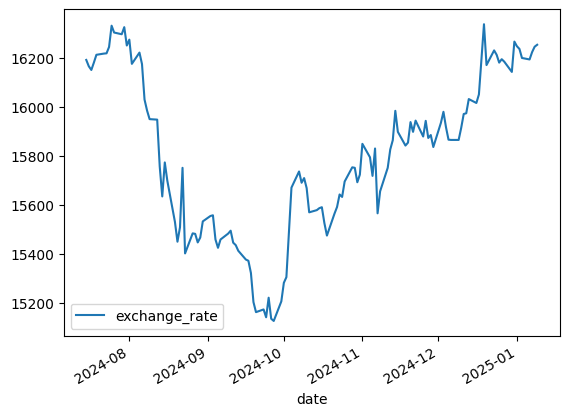

In [278]:
df.plot()

## Analysis

The exchange rate between USD and IDR fuctuates over the six months period. The highest exchange rate happened in August 2024 and end of December 2025, reaching over IDR 16,200, while the lowest rate was on September 2024 at around IDR 15,100.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.